In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42

In [2]:
data = pd.read_csv('churn_data.csv')

In [3]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,1,3,29.85,29.85,0
1,5575-GNVDE,34,1,2,0,4,56.95,1889.50,0
2,3668-QPYBK,2,1,1,1,4,53.85,108.15,1
3,7795-CFOCW,45,0,2,0,1,42.30,1840.75,0
4,9237-HQITU,2,1,1,1,3,70.70,151.65,1


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['customerID'] = label_encoder.fit_transform(data['customerID'])

In [5]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,1,0,1,1,3,29.85,29.85,0
1,3962,34,1,2,0,4,56.95,1889.50,0
2,2564,2,1,1,1,4,53.85,108.15,1
3,5535,45,0,2,0,1,42.30,1840.75,0
4,6511,2,1,1,1,3,70.70,151.65,1


In [6]:
#Create X and y features
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Churn"]]
target = "Churn"
state = np.random.RandomState(42)
X = data[columns]
y = data[target]
print(X.shape)
print(y.shape)

(7043, 8)
(7043,)


Text(0, 0.5, 'Frequency')

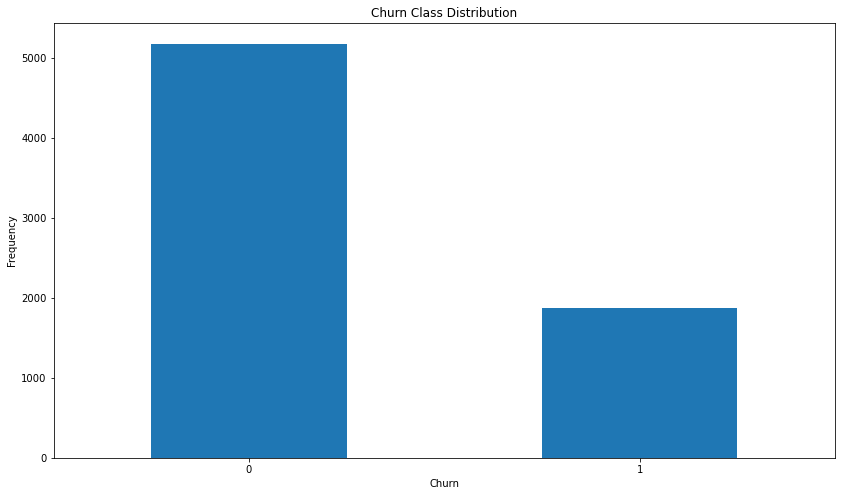

In [7]:
count_classes = pd.value_counts(data['Churn'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title('Churn Class Distribution')
plt.xlabel("Churn")
plt.ylabel("Frequency")

In [8]:
n_rows = X.shape[0]
n_cols = X.shape[1]
classes = y.unique()
# summarize
print('Class Breakdown:')
# class breakdown
breakdown = ''
for c in classes:
 total = len(y[y == c])
 ratio = (total / float(len(y))) * 100
 print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

Class Breakdown:
 - Class 0: 5174 (73.46301%)
 - Class 1: 1869 (26.53699%)


## One class SVM

In [9]:
#Looking at correlations helps in identifying a lot of features beforehand which are not important.
#We use matplotlib and seaborn.

#Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
#to make plot graphics appear in notebook

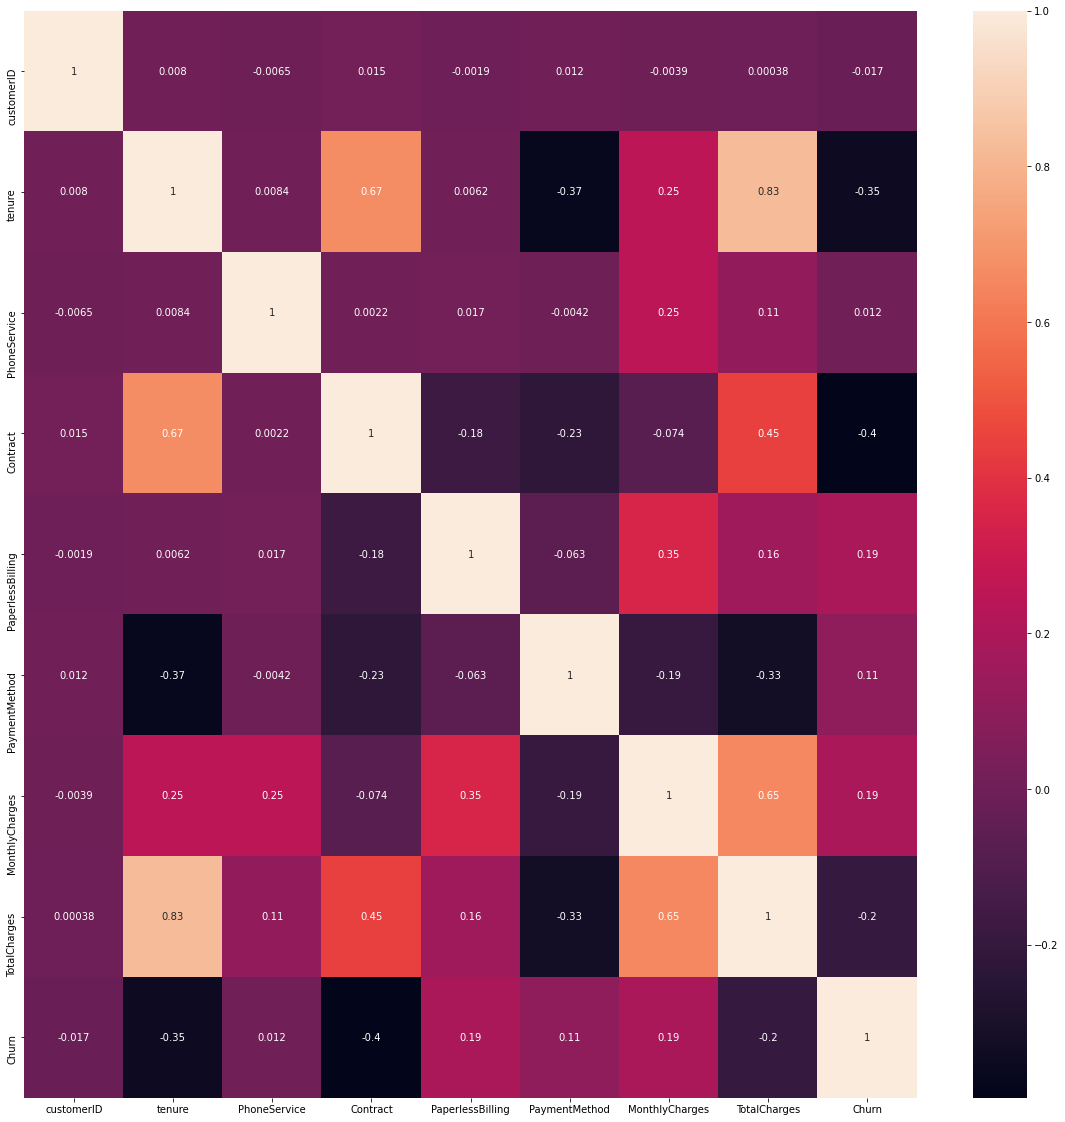

In [10]:
#Let's see the correlation matrix-HeatMap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [20]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=42)

In [21]:
from sklearn import svm
from sklearn.datasets import make_classification

In [22]:
model = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [25]:
res = model.fit(X)
y_train_pred = res.predict(X_train)
y_train_pred[:10]

array([ 1,  1,  1,  1,  1,  1, -1,  1, -1,  1], dtype=int64)

In [26]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,1,1695
1,0,1,1095
2,0,1,3889
3,0,1,3667
4,0,1,2902


In [27]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,1,1695,1
1,0,1,1095,1
2,0,1,3889,1
3,0,1,3667,1
4,0,1,2902,1


In [28]:
from sklearn import metrics

In [29]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[1443 2192]
 [ 519  776]]


In [30]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.45010141987829616


## SVM with cost function =1

In [33]:
from sklearn.svm import SVC
# Model building

# instantiate an object of class SVC()
# note that we are using cost C=1
model1 = SVC(C = 1)

# fit
model1.fit(X_train, y_train)

# predict
y_pred = model1.predict(X_test)

In [35]:
res1 = model1.fit(X,y)
y_train_pred = res1.predict(X_train)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0,1695
1,0,0,1095
2,0,0,3889
3,0,0,3667
4,0,0,2902


In [38]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0,1695,0
1,0,0,1095,0
2,0,0,3889,0
3,0,0,3667,0
4,0,0,2902,0


In [39]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3635    0]
 [1295    0]]


In [40]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7373225152129818
